In [1]:
import numpy as np
import keras
from keras import layers
from keras import metrics
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps 
import os
from os import listdir
import random

2024-02-20 14:48:32.960770: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-20 14:48:33.008088: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-20 14:48:33.298635: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-20 14:48:33.299114: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-20 14:48:33.351820: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [7]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)
# get the path/directory
image_list=[]
label_list=[]
folder_dir = "bmpProcessedSeuil"
for images in os.listdir(folder_dir):
    # check if the image ends with png
    if (images.endswith(".bmp")):
        temp=Image.open(folder_dir+"/"+images)
        temp=temp.rotate(180)
        temp=ImageOps.grayscale(temp) 
        image_list.append(temp)
        label_list.append(images.split('_')[0])
        #temp.show()

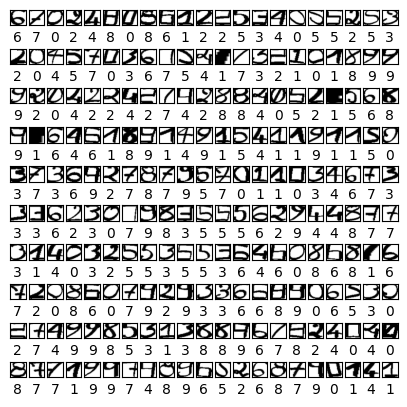

In [8]:
plt.figure(figsize=(5,5))
for i in range(210):
    plt.subplot(10,21,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_list[i], cmap=plt.cm.binary)
    plt.xlabel(label_list[i])
plt.show()

Separation train set et test set + passage en numpy

In [9]:
train_set=[]
train_label=[]
test_set=[]
test_label=[]
r = list(range (len(image_list)))
random.shuffle(r)
for i in r:
    if label_list[i] in test_label : #deja une image dans le test avec le meme label
        train_set.append(image_list[i])
        train_label.append(label_list[i])
    else :
        test_set.append(image_list[i])
        test_label.append(label_list[i])

#convert to numpy arrays
train_set=np.asarray(train_set)
train_label=np.array(train_label)
test_set=np.asarray(test_set)
test_label=np.array(test_label)
print(train_set[0].shape)
train_set=np.expand_dims(train_set, -1)
test_set=np.expand_dims(test_set, -1)
print(train_set[0].shape)

(28, 28)
(28, 28, 1)


Preprocess data

In [10]:
# train_set = train_set / 255.0
# test_set = test_set / 255.0
x_train = train_set.astype("float32") / 255
x_test = test_set.astype("float32") / 255

y_train = keras.utils.to_categorical(train_label, num_classes)
y_test = keras.utils.to_categorical(test_label, num_classes)

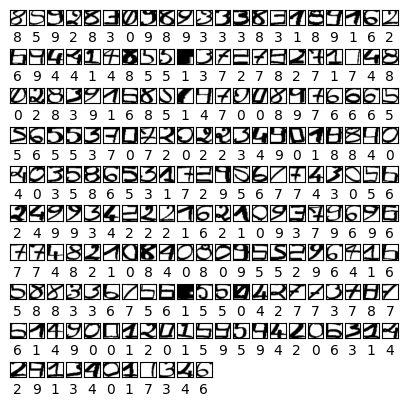

In [11]:
plt.figure(figsize=(5,5))
for i in range(200):
    plt.subplot(10,21,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_set[i], cmap=plt.cm.binary)
    plt.xlabel(train_label[i])
plt.show()

Create model

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 1600)              0         
                                                                 
 dense_9 (Dense)             (None, 10)               

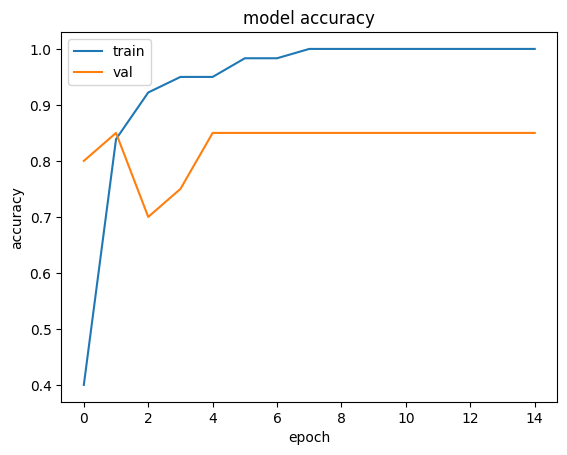

In [19]:
model_base = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
print(model_base.summary())
model_base.compile(loss="mse", optimizer="adam", metrics=["accuracy"])
history =model_base.fit(x_train, y_train, batch_size=1, epochs=15, validation_split=0.1,verbose=0,use_multiprocessing=False)
score = model_base.evaluate(x_test, y_test, verbose=1,use_multiprocessing=False)
print("Test loss model_base:", score[0],"accuracy",score[1])
# plotting the metrics
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [9]:
# saving the model
save_dir = "results/"
model_name = 'keras_mnist_base.h5'
model_path = os.path.join(save_dir, model_name)
model_base.save(model_path)
print('Saved trained model at %s ' % model_path)
model_name = 'keras_mnist_base.keras'
model_path = os.path.join(save_dir, model_name)
model_base.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at results/keras_mnist_base.h5 


/home/rocher/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Evaluate model

1/1 [==============================] - 0s 45ms/step

98  classified correctly
2  classified incorrectly


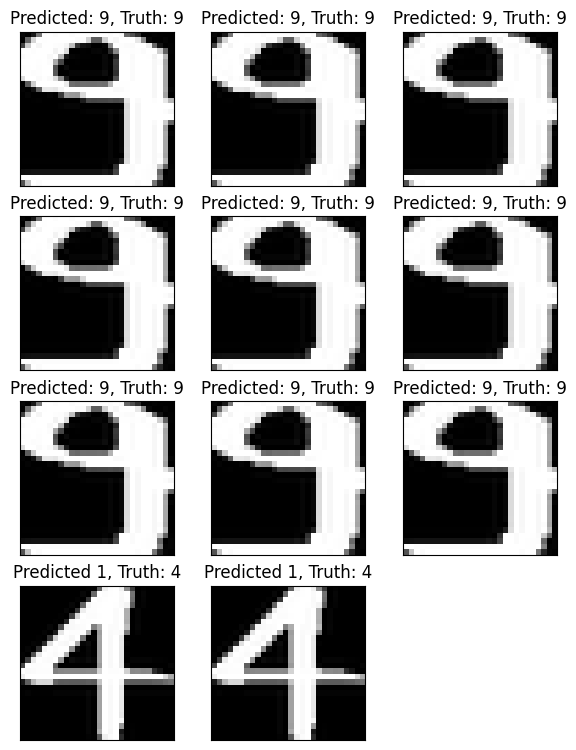

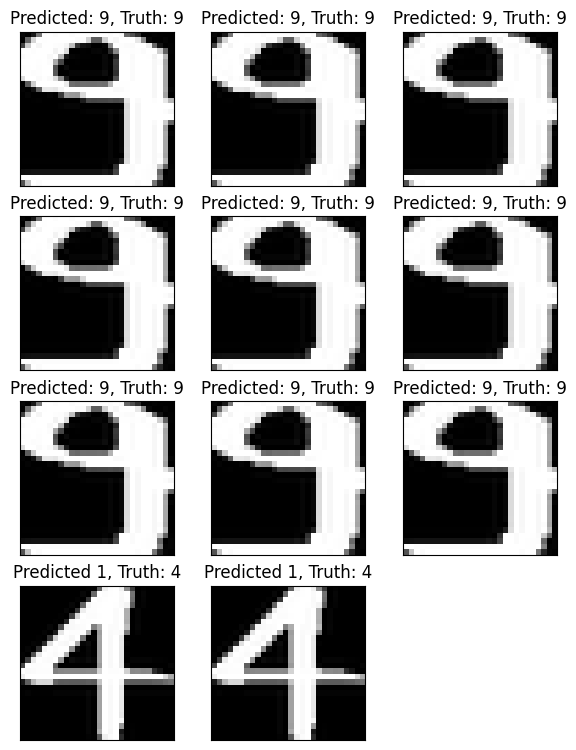

In [9]:
# load the model and create predictions on the test set
mnist_model = tf.keras.models.load_model("results/keras_mnist_base.h5")
# predict_x=model.predict(X_test) 
# classes_x=np.argmax(predict_x,axis=1)
predicted_classes = mnist_model.predict(test_set)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(np.argmax(predicted_classes[correct]),
                                        test_label[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(np.argmax(predicted_classes[incorrect]), 
                                       test_label[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation

get weights and bias

In [15]:
model_base.save_weights('./results/my_checkpoint')
i=0
for layer in model_base.layers:

    with open('results/config_layer_'+str(i)+'_'+str(layer)+'.txt', 'a') as f:
        f.write(str(layer.get_config()))

    try:
        weights,bias=layer.get_weights()
        # with open('results/weights_'+str(i)+'_'+str(layer)+'.txt', 'a') as f:
        #     f.write(str(np.array(weights).T))
        np.savetxt('results/weights_'+str(i)+'_'+str(layer)+'.txt',np.array(weights).T.flatten())
        np.savetxt('results/bias_'+str(i)+'_'+str(layer)+'.txt',np.array(bias))
    except :
        pass
    i=i+1

with open('results/json_'+str(layer)+'.txt', 'a') as f:
    f.write(model_base.to_json())


fullModel= tf.keras.backend.function([model_base.layers[0].input],[model_base.layers[l].output for l in range(len(model_base.layers))])
layer_outputs = fullModel([test_set[0:1]])

i=0
for l in range(len(model_base.layers)):
  np.savetxt('results/outputlayer_'+str(i)+'_'+str(layer)+".txt", np.array(layer_outputs[l]).T.flatten())
  i=i+1